# Data extraction and visualistation
The Data is extracted from 1000GENOMES:phase3 project

In [15]:
import requests, sys
import matplotlib.pyplot as plt
import numpy as np
import os

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO
from Bio.Alphabet import generic_dna
from Bio.SeqRecord import SeqRecord
import ipymsa

import skbio


## Get request to obtain json data

In [8]:
server = "https://rest.ensembl.org/transcript_haplotypes/homo_sapiens/"
# Choose different extension for different gene
ext = "ENST00000380152?content-type=application/json;sequence=1"
 
r = requests.get(server + ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()

In [12]:
decoded.keys()

dict_keys(['protein_haplotypes', 'transcript_id', 'total_haplotype_count', 'total_population_counts', 'cds_haplotypes'])

In [14]:
# ID of the transcript, where we investigate the haplotypes
decoded["transcript_id"]

'ENST00000380152'

### Populations counts
Frequencies of sampled individuals that were sequenced to obtain this haplotypes

<BarContainer object of 31 artists>

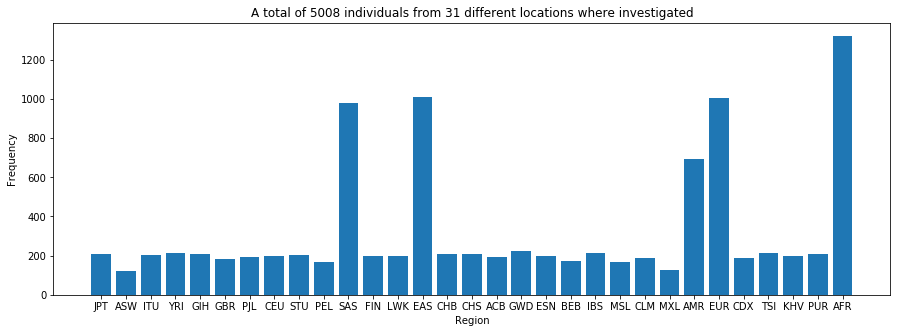

In [15]:
population_counts = decoded["total_population_counts"]
populations = []
counts = []
for key in population_counts:
    if not ('_all' in key or ':ALL' in key):
        name = key.split(sep=":")
        populations.append(name[2])
        counts.append(population_counts[key])

plt.figure(figsize=(15, 5))
plt.title("A total of " + str(population_counts["_all"]) + " individuals from " + str(len(population_counts)-2) + " different locations where investigated")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.bar(populations, counts, align='center')
    

## Extract sequence data

In [11]:
haplotypes = decoded["cds_haplotypes"]

In [12]:
seqs = []
i = 0
for haplo in haplotypes:
    i += 1
    seqs.append(SeqRecord(Seq(haplo["seq"], generic_dna), id=str(i)))

In [9]:
def muscle_alignment(seqs):
    """Align 2 sequences with muscle"""
    filename = 'temp.faa'
    SeqIO.write(seqs, filename, "fasta")
    name = os.path.splitext(filename)[0]
    from Bio.Align.Applications import MuscleCommandline
    cline = MuscleCommandline(input=filename, out=name+'.txt')
    stdout, stderr = cline()
    align = AlignIO.read(name+'.txt', 'fasta')
    return align

In [19]:
align = muscle_alignment(seqs[:3])

TTCTACTGTGCTCATAGTCAGAAATGAAGAAGCATCTGAAACTGTATTTCCTCATGATACTACTGCTAATGTGAAAAGCTATTTTTCCAATCATGATGAAAGTCTGAAGAAAAATGATAGATTTATCGCTTCTGTGACAGACAGTGAAAACACAAATCAAAGAGAAGCTGCAAGTCATGGATTTGGAAAAACATCAGGGAATTCATTTAAAGTAAATAGCTGCAAAGACCACATTGGAAAGTCAATGCCAAATGTCCTAGAAGATGAAGTATATGAAACAGTTGTAGATACCTCTGAAGAAGATAGTTTTTCATTATGTTTTTCTAAATGTAGAACAAAAAATCTACAAAAAGTAAGAACTAGCAAGACTAGGAAAAAAATTTTCCATGAAGCAAACGCTGATGAATGTGAAAAATCTAAAAACCAAGTGAAAGAAAAATACTCATTTGTATCTGAAGTGGAACCAAATGATACTGATCCATTAGATTCAAATGTAGCACATCAGAAGCCCTTTGAGAGTGGAAGTGACAAAATCTCCAAGGAAGTTGTACCGTCTTTGGCCTGTGAATGGTCTCAACTAACCCTTTCAGGTCTAAATGGAGCCCAGATGGAGAAAATACCCCTATTGCATATTTCTTCATGTGACCAAAATATTTCAGAAAAAGACCTATTAGACACAGAGAACAAAAGAAAGAAAGATTTTCTTACTTCAGAGAATTCTTTGCCACGTATTTCTAGCCTACCAAAATCAGAGAAGCCATTAAATGAGGAAACAGTGGTAAATAAGAGAGATGAAGAGCAGCATCTTGAATCTCATACAGACTGCATTCTTGCAGTAAAGCAGGCAATATCTGGAACTTCTCCAGTGGCTTCTTCATTTCAGGGTATCAAAAAGTCTATATTCAGAATAAGAGAATCACCTAAAGAGACTTTCAATGCAAGTTTTTCAGGTCATATGACTGATCCAAACTTTAAAAAAGAAACTGAAGCCTCTGAAAGT

In [31]:
os.system("ls")

0